In [31]:
import sys ; sys.path.append("../")
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cvlib

In [32]:
var = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
var_respuesta = []
for i in var:
    data = []
    for x in i:
        if (x == -1):
            data.append(10)
        else:
            data.append(x)
    var_respuesta.append(data)
print(var_respuesta)

[[10, 10, 10], [10, 9.5, 10], [10, 10, 10]]


In [38]:
def sharpen(img:np.array, kernel:np.array):
    
    # Get the height, width, and number of channels of the image
    height,width,c =img.shape[0],img.shape[1],img.shape[2]
    
    # Get the height, width, and number of channels of the kernel
    kernel_height,kernel_width = kernel.shape[0],kernel.shape[1]
    
    # Create a new image of original img size minus the border 
    # where the convolution can't be applied
    new_img = np.zeros((height-kernel_height+1,width-kernel_width+1,3)) 
    
    # Loop through each pixel in the image
    # But skip the outer edges of the image
    for i in range(kernel_height//2, height-kernel_height//2-1):
        for j in range(kernel_width//2, width-kernel_width//2-1):
            # Extract a window of pixels around the current pixel
            window = img[i-kernel_height//2 : i+kernel_height//2+1,j-kernel_width//2 : j+kernel_width//2+1]
            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            var = np.absolute(int((window[:,:,0] * kernel).sum()))
            if (var > 255):
                new_img[i, j, 0] = int(255)
            else:
                new_img[i, j, 0] = var
            var = np.absolute(int((window[:,:,1] * kernel).sum()))
            if (var > 255):
                new_img[i, j, 1] = int(255)
            else:
                new_img[i, j, 1] = var
            var = np.absolute(int((window[:,:,2] * kernel).sum()))
            if (var > 255):
                new_img[i, j, 2] = int(255)
            else:
                new_img[i, j, 2] = var
      
    # Clip values to the range 0-255
    #new_img = np.clip(new_img, 0, 255)
    return new_img.astype(np.uint8)

In [39]:
img = cv.imread('shop.jpeg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
img_sharpen = sharpen(img=img, kernel=kernel)

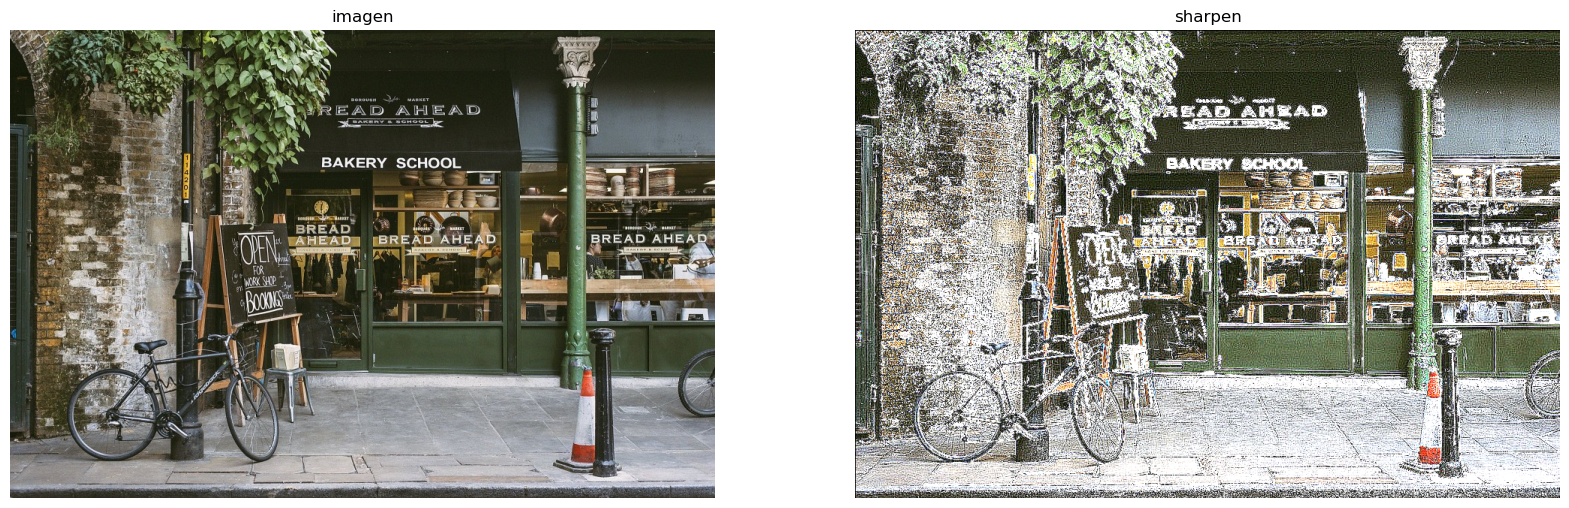

In [40]:
#img2, img2_v = sharpen(img)
cvlib.imgcmp(img, img_sharpen, title=["imagen", "sharpen"])